In [15]:
import requests
import pandas as pd
import re
from sklearn.metrics import accuracy_score
import warnings
import numpy as np

# Import dataset dari hasil TF-IDF
from google.colab import drive
drive.mount('/content/drive')

df_dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data.xlsx')
df_dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,text,Sentimen,cleansing,casefolding,steemed,normalisasi,tokenizing,tf_dict,tf_idf_dict,tf_idf_vec
0,0,"23:29:56,""Semoga aplikasinya cepat diperbaiki,...",1,Semoga aplikasinya cepat diperbaiki kare...,semoga aplikasinya cepat diperbaiki kare...,moga aplikasi cepat baik karena begitu banyak ...,moga aplikasi cepat aplikasi aplikasi susahkar...,"['moga', 'aplikasi', 'cepat', 'aplikasi', 'apl...","{'moga': 0.125, 'aplikasi': 0.375, 'cepat': 0....","{'moga': 0.37956928350928076, 'aplikasi': 0.22...","[0.22830226204732287, 0.0, 0.0, 0.229072682968..."
1,1,"23:31:43,Aplikasi apa ini nik tidak terbaca",1,Aplikasi apa ini nik tidak terbaca,aplikasi apa ini nik tidak terbaca,aplikasi apa ini nik tidak baca,aplikasi nik baca,"['aplikasi', 'nik', 'baca']","{'aplikasi': 0.3333333333333333, 'nik': 0.3333...","{'aplikasi': 0.20293534404206476, 'nik': 1.108...","[0.20293534404206476, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,2,"23:41:43,Ntah laah susah di jelaskan....ribeet…",0,Ntah laah susah di jelaskanribeet,ntah laah susah di jelaskanribeet,ntah laah susah di jelaskanribeet,ntah laah susah jelaskanribeet,"['ntah', 'laah', 'susah', 'jelaskanribeet']","{'ntah': 0.25, 'laah': 0.25, 'susah': 0.25, 'j...","{'ntah': 1.2070784343255754, 'laah': 1.2070784...","[0.0, 0.0, 0.0, 0.45814536593707755, 0.0, 0.0,..."
3,3,"23:45:23,Selevel negara kok g mampu bikin apli...",0,Selevel negara kok g mampu bikin aplikas...,selevel negara kok g mampu bikin aplikas...,level negara kok g mampu bikin aplikasi yg bai...,level negara bikin aplikasi yg udah dftr ulang...,"['level', 'negara', 'bikin', 'aplikasi', 'yg',...","{'level': 0.045454545454545456, 'negara': 0.09...","{'level': 0.2194688062410137, 'negara': 0.3759...","[0.027673001460281562, 0.0, 0.0664099048779921..."
4,4,"00:00:53,""Maaf kasih 1 bntng karna ga epektif...",0,Maaf kasih bntng karna ga epektif mala...,maaf kasih bntng karna ga epektif mala...,maaf kasih bntng karna ga epektif malah tambah...,maaf kasih bntng karna ga epektif ribet daftar...,"['maaf', 'kasih', 'bntng', 'karna', 'ga', 'epe...","{'maaf': 0.1111111111111111, 'kasih': 0.111111...","{'maaf': 0.5364793041447001, 'kasih': 0.305430...","[0.0, 0.13831053320513234, 0.0, 0.203620162638..."
...,...,...,...,...,...,...,...,...,...,...,...
245,245,"Setelah hampir sehari mengisi data diri,di sub...",1,Setelah hampir sehari mengisi data diridi subs...,setelah hampir sehari mengisi data diridi subs...,telah hampir hari isi data ridi subsidi tepat ...,isi data ridi subsidi sasaranpilihan simpan dn...,"['isi', 'data', 'ridi', 'subsidi', 'sasaranpil...","{'isi': 0.1111111111111111, 'data': 0.11111111...","{'isi': 0.25148493109341824, 'data': 0.2355848...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23558483..."
246,246,Dengan aplikasi MyPertamina👍👍,1,Dengan aplikasi MyPertamina,dengan aplikasi mypertamina,dengan aplikasi mypertamina,aplikasi mypertamina,"['aplikasi', 'mypertamina']","{'aplikasi': 0.5, 'mypertamina': 0.5}","{'aplikasi': 0.30440301606309716, 'mypertamina...","[0.30440301606309716, 0.0, 0.0, 0.0, 0.0, 0.0,..."
247,247,Masih ada banyak kekurangan / ada banyak sekal...,0,Masih ada banyak kekurangan ada banyak sekal...,masih ada banyak kekurangan ada banyak sekal...,masih ada banyak kurang ada banyak sekali bug ...,bug sulit aplikasi tolol bikin,"['bug', 'sulit', 'aplikasi', 'tolol', 'bikin']","{'bug': 0.2, 'sulit': 0.2, 'aplikasi': 0.2, 't...","{'bug': 0.7151101537613866, 'sulit': 0.4686814...","[0.12176120642523887, 0.0, 0.0, 0.0, 0.0, 0.0,..."
248,248,Tolong di batasin donk pembelian pertalite yg ...,1,Tolong di batasin donk pembelian pertalite yg ...,tolong di batasin donk pembelian pertalite yg ...,tolong di batasin donk beli pertalite yg guna ...,tolong batasin donk beli pertalite yg kapasitas,"['tolong', 'batasin', 'donk', 'beli', 'pertali...","{'tolong': 0.14285714285714285, 'batasin': 0.1...","{'tolong': 0.49171705374034436, 'batasin': 0.6...","[0.0, 0.0, 0.208716843902261, 0.0, 0.0, 0.0, 0..."


In [16]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
# Jadikan sentimen (nilai y) menjadi nilai 0 dan 1

enc = LabelEncoder()
df_dataset['Sentimen'] = enc.fit_transform(df_dataset['Sentimen'].values)
cls = df_dataset['Sentimen']
cls

0      1
1      1
2      0
3      0
4      0
      ..
245    1
246    1
247    0
248    1
249    0
Name: Sentimen, Length: 250, dtype: int64

In [18]:
# Tetapkan nilai X dari hasil TF-IDF 

attrs = df_dataset['tf_idf_vec']
attrs

0      [0.22830226204732287, 0.0, 0.0, 0.229072682968...
1      [0.20293534404206476, 0.0, 0.0, 0.0, 0.0, 0.0,...
2      [0.0, 0.0, 0.0, 0.45814536593707755, 0.0, 0.0,...
3      [0.027673001460281562, 0.0, 0.0664099048779921...
4      [0.0, 0.13831053320513234, 0.0, 0.203620162638...
                             ...                        
245    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23558483...
246    [0.30440301606309716, 0.0, 0.0, 0.0, 0.0, 0.0,...
247    [0.12176120642523887, 0.0, 0.0, 0.0, 0.0, 0.0,...
248    [0.0, 0.0, 0.208716843902261, 0.0, 0.0, 0.0, 0...
249    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: tf_idf_vec, Length: 250, dtype: object

In [19]:
attrs[1]

'[0.20293534404206476, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]'

In [20]:
# Jadikan nilai x menjadi dataframe
import ast
for i in range(len(attrs)):
    attrs[i] = ast.literal_eval(attrs[i])

column_name = []
dataset = []

for i in range(len(attrs[0])):
    column_name.append("X"+str(i))

for i in range(len(attrs)):
    dataset.append(attrs[i])

attr = pd.DataFrame(dataset, columns=column_name)
attr

<ipython-input-20-c3bd5cb043e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrs[i] = ast.literal_eval(attrs[i])


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,0.228302,0.000000,0.000000,0.229073,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.202935,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,0.458145,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.027673,0.000000,0.066410,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.106519,0.000000,0.110474,0.000000,0.114806,0.0
4,0.000000,0.138311,0.000000,0.203620,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.235585,0.0,0.000000,...,0.0,0.251485,0.0,0.255843,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
246,0.304403,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.215209,0.000000,0.0
247,0.121761,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.468681,0.000000,0.000000,0.000000,0.000000,0.0
248,0.000000,0.000000,0.208717,0.000000,0.0,0.0,0.0,0.000000,0.0,0.307738,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

# Proses K-FOLDING
kf = KFold(n_splits=2)
kf.get_n_splits(attr)
x_train_data = [0,0]
x_test_data = [0,0]
y_train_data = [0,0]
y_test_data = [0,0]
for i, (train_index, test_index) in enumerate(kf.split(attr)):
    # x_train, x_test, y_train, y_test = train_test_split(attr, cls, test_size = 0.2)
    x_train , x_test = attr.iloc[train_index,:],attr.iloc[test_index,:]
    y_train , y_test = cls[train_index] , cls[test_index]

    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    tree = SVC()
    tree.fit(x_train, y_train)

    x_train_data[i] = x_train
    x_test_data[i] = x_test
    y_train_data[i] = y_train
    y_test_data[i] = y_test

In [22]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

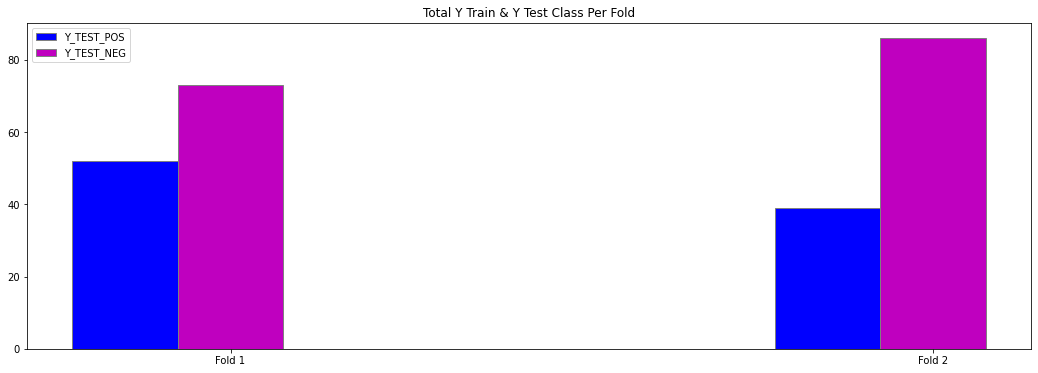

In [23]:
# PLot nilai Y test per fold

fig = plt.subplots(figsize=(18,6))
barWidth = 0.15
Y_TEST_POS = [sum(p == 1 for p in y_test_data[0]), sum(p == 1 for p in y_test_data[1])]
Y_TEST_NEG = [sum(p == 0 for p in y_test_data[0]), sum(p == 0 for p in y_test_data[1])]

br1 = np.arange(len(Y_TEST_POS))
br2 = [x + barWidth for x in br1]

plt.title("Total Y Train & Y Test Class Per Fold")
plt.bar(br1, Y_TEST_POS, color ='b', width = barWidth,
        edgecolor ='grey', label ='Y_TEST_POS')
plt.bar(br2, Y_TEST_NEG, color ='m', width = barWidth,
        edgecolor ='grey', label ='Y_TEST_NEG')

plt.xticks([r + barWidth for r in range(len(Y_TEST_POS))],
        ["Fold 1", "Fold 2"])
 
plt.legend()
plt.show()

In [24]:
# Parameter SVM

c_data = 15
max_iteration = 50000
tolerance = 0.01
np.random.seed(10)

Accuration:  70.39999999999999 %
Precission:  69.23076923076923 %
Recall:  51.92307692307693 %
F1 Score:  59.34065934065933 %


Text(69.0, 0.5, 'Truth')

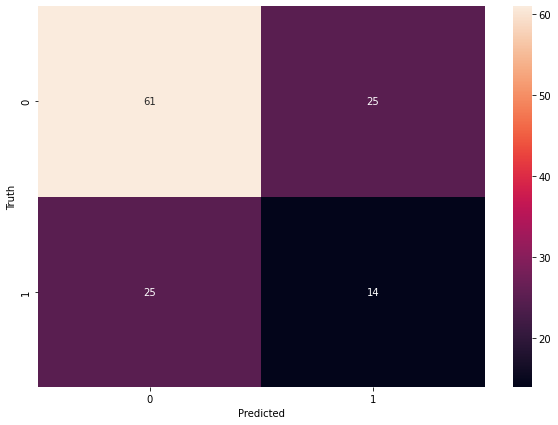

In [25]:
# Proses training FOLD-1

fold_1 = SVC(
    C = c_data,
    kernel = 'linear',
    max_iter = max_iteration,
    random_state = 0,
    tol = tolerance,
    )

# Proses testing FOLD-1
fold_1 = fold_1.fit(x_train_data[0], y_train_data[0])

prediction_1 = fold_1.predict(x_test_data[0])
false_1 = (prediction_1 != y_test_data[0]).sum()
true_1 = (prediction_1 == y_test_data[0]).sum()
tn_1, fp_1, fn_1, tp_1 = confusion_matrix(y_test_data[0], prediction_1).ravel()
precision_score_1 = tp_1 / (tp_1 + fp_1)
recall_score_1 = tp_1 / (tp_1 + fn_1)
f1_score_1 = 2 * (recall_score_1 * precision_score_1) / (recall_score_1 + precision_score_1)

# Hasil Akurasi
print("Accuration: ", true_1 / (true_1 + false_1) * 100, '%')
# Hasil Presisi
print("Precission: ", precision_score_1 * 100, "%")
# Hasil Recall
print("Recall: ", recall_score_1 * 100, "%")
# Hasil F1
print("F1 Score: ", f1_score_1 * 100, "%")
print("======================")
# Plot Confusion Matrix
cm_1 = confusion_matrix(y_test, prediction_1)
plt.figure(figsize=(10,7))
sn.heatmap(cm_1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuration:  70.39999999999999 %
Precission:  52.5 %
Recall:  53.84615384615385 %
F1 Score:  53.16455696202531 %


Text(69.0, 0.5, 'Truth')

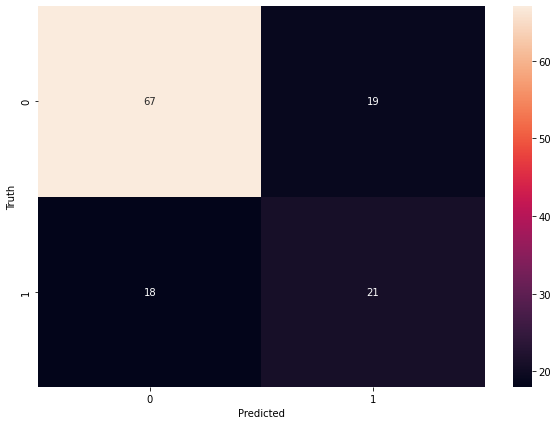

In [26]:
# Proses training FOLD-2

fold_2 = SVC(
    C = c_data,
    kernel = 'linear',
    max_iter = max_iteration,
    random_state = 0,
    tol = tolerance,
    )

# Proses testing FOLD-2
fold_2 = fold_2.fit(x_train_data[1], y_train_data[1])

prediction_2 = fold_2.predict(x_test_data[1])
false_2 = (prediction_2 != y_test_data[1]).sum()
true_2 = (prediction_2 == y_test_data[1]).sum()
tn_2, fp_2, fn_2, tp_2 = confusion_matrix(y_test_data[1], prediction_2).ravel()
precision_score_2 = tp_2 / (tp_2 + fp_2)
recall_score_2 = tp_2 / (tp_2 + fn_2)
f1_score_2 = 2 * (recall_score_2 * precision_score_2) / (recall_score_2 + precision_score_2)

# Hasil Akurasi
print("Accuration: ", true_2 / (true_2 + false_2) * 100, '%')
# Hasil Presisi
print("Precission: ", precision_score_2 * 100, "%")
# Hasil Recall
print("Recall: ", recall_score_2 * 100, "%")
# Hasil F1
print("F1 Score: ", f1_score_2 * 100, "%")
print("======================")
# Plot Confusion Matrix
cm_2 = confusion_matrix(y_test, prediction_2)
plt.figure(figsize=(10,7))
sn.heatmap(cm_2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

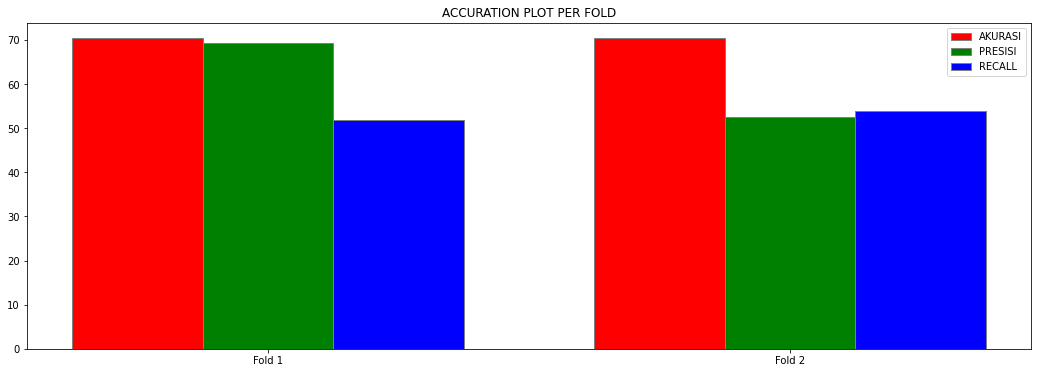

In [27]:
fig = plt.subplots(figsize=(18,6))
barWidth = 0.25
ACCURACY = [(true_1 / (true_1 + false_1) * 100), (true_2 / (true_2 + false_2) * 100)]
PRECISION = [precision_score_1 * 100, precision_score_2 * 100]
RECALL = [recall_score_1 * 100, recall_score_2 * 100]
 
br1 = np.arange(len(ACCURACY))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.title("ACCURATION PLOT PER FOLD")
plt.bar(br1, ACCURACY, color ='r', width = barWidth,
        edgecolor ='grey', label ='AKURASI')
plt.bar(br2, PRECISION, color ='g', width = barWidth,
        edgecolor ='grey', label ='PRESISI')
plt.bar(br3, RECALL, color ='b', width = barWidth,
        edgecolor ='grey', label ='RECALL')

plt.xticks([r + barWidth for r in range(len(ACCURACY))],
    ["Fold 1", "Fold 2"])
 
plt.legend()
plt.show()

Akurasi 70.39999999999999 %
Presisi 60.86538461538461 %
Recall 52.88461538461539 %


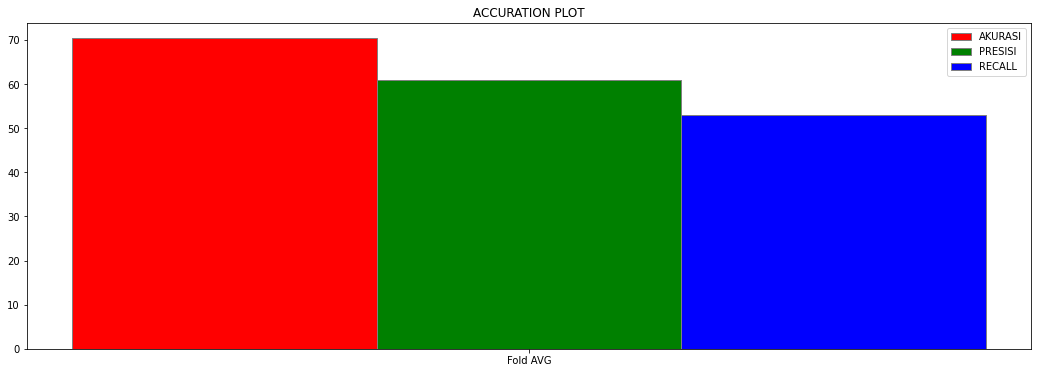

In [28]:
def get_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           

    avg = sum_num / len(num)
    return avg

acc_avg = get_average(ACCURACY)
pre_avg = get_average(PRECISION)
rec_avg = get_average(RECALL)

print('Akurasi', acc_avg, '%')
print('Presisi', pre_avg, '%')
print('Recall', rec_avg, '%')

fig = plt.subplots(figsize=(18,6))
barWidth = 0.1
 
br1 = np.arange(len([acc_avg]))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.title("ACCURATION PLOT")
plt.bar(br1, [acc_avg], color ='r', width = barWidth,
        edgecolor ='grey', label ='AKURASI')
plt.bar(br2, [pre_avg], color ='g', width = barWidth,
        edgecolor ='grey', label ='PRESISI')
plt.bar(br3, [rec_avg], color ='b', width = barWidth,
        edgecolor ='grey', label ='RECALL')

plt.xticks([r + barWidth for r in range(len([acc_avg]))],
    ["Fold AVG"])
 
plt.legend()
plt.show()